In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import polars as pl
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

2532
3362
{'Author': 0.02, 'Title': 0.02, 'Type of Ban': 57.04, 'State': 0.0, 'District': 0.0, 'Date of Challenge/Removal': 0.0, 'Origin of Challenge': 0.0, 'Ban Status': 42.96}
(5894, 9)
5894


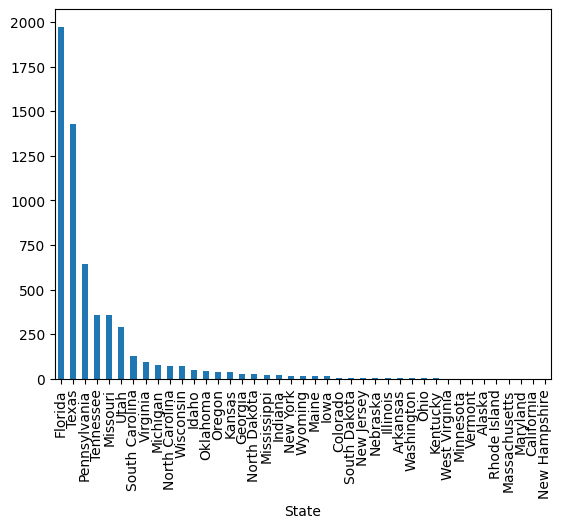

In [2]:
def null_pct(df):
    return dict(zip(df.columns, [round(100*len(df.loc[df[c].isnull()])/len(df),2) for c in df.columns]))
pen_path_2021 = "pen america/PEN America's Index of School Book Bans (July 1, 2021 - June 30, 2022).xlsx"
pen_21_df = pd.read_excel(pen_path_2021, sheet_name='Sorted by Author & Title', skiprows=2)
print(len(pen_21_df))
pen_path_2022 = "pen america/PEN America's Index of School Book Bans (July 1, 2022 - June 30, 2023).xlsx"
pen_22_df = pd.read_excel(pen_path_2022, sheet_name='Sorted by Author & Title', skiprows=2)
print(len(pen_22_df))
pen_df = pd.concat((pen_21_df, pen_22_df), axis=0, ignore_index=True)\
    .drop(['Secondary Author(s)', 'Illustrator(s)', 'Translator(s)', 'Series Name'], axis=1)

print(null_pct(pen_df))
pen_df = pen_df.rename(columns={'Date of Challenge/Removal': 'DateBan'}).drop_duplicates()
pen_df['Country'] = 'USA'
date_dict = {"AY 2022-2023":"2022-09-01", "Fall 2022":"2022-09-01", "Spring 2023":"2023-01-01"}
pen_df['DateBan'] = pen_df['DateBan'].replace(date_dict)
pen_df['DateBan'] = pd.to_datetime(pen_df['DateBan'])
print(pen_df.shape)
pen_df.groupby('State').size().sort_values(ascending=False).plot.bar()
#print(pen_df.groupby('DateBan').size())
pen_df = pen_df.loc[~pen_df['DateBan'].apply(lambda x: isinstance(x, str)),:]
print(len(pen_df))

<Axes: xlabel='Title'>

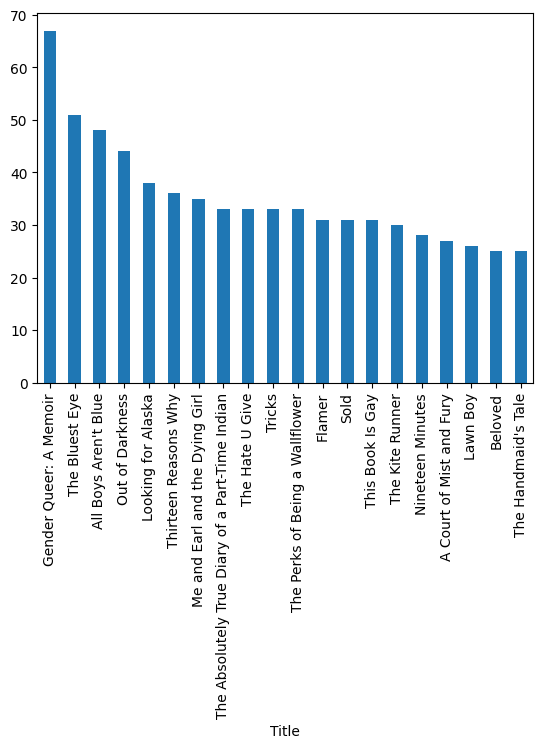

In [3]:
pen_df.groupby('Title').size().sort_values(ascending=False)[:20].plot.bar()

In [4]:
lidrekon_df = pd.read_csv('lidrekon/lidrekon.csv').rename(columns={'Date':'DateBan'})
lidrekon_df = lidrekon_df.drop([lidrekon_df.columns[0], 'TitleCandidates'], axis=1)\
                .drop_duplicates()
lidrekon_df['Country'] = 'RUS'
lidrekon_df['DateBan'] = pd.to_datetime(lidrekon_df['DateBan'])
print(lidrekon_df.dtypes)
print(null_pct(lidrekon_df))
print(lidrekon_df.head())
print(lidrekon_df.shape)

DateBan        datetime64[ns]
Description            object
Title                  object
Country                object
dtype: object
{'DateBan': 0.0, 'Description': 0.0, 'Title': 0.08, 'Country': 0.0}
              DateBan                                        Description  \
0 2024-04-27 02:33:20  Музыкальная композиция "SKVERNA", продолжитель...   
1 2024-03-11 12:46:18  Информационный материал – публикация (статья) ...   
2 2024-03-11 12:45:09  Листовка "Исполнительного комитета Совета наро...   
3 2024-01-15 04:04:18  Музыкальная композиция "i..ш русню", продолжит...   
4 2023-12-28 01:19:07  Текстовый материал "Протокол регистрации прест...   

                                               Title Country  
0                                            SKVERNA     RUS  
1  К десятилетию Кёнделенского противостояния 14-...     RUS  
2  Исполнительного комитета Совета народных депут...     RUS  
3                                         i..ш русню     RUS  
4  Протокол регистрации пр

<Axes: xlabel='DateBan'>

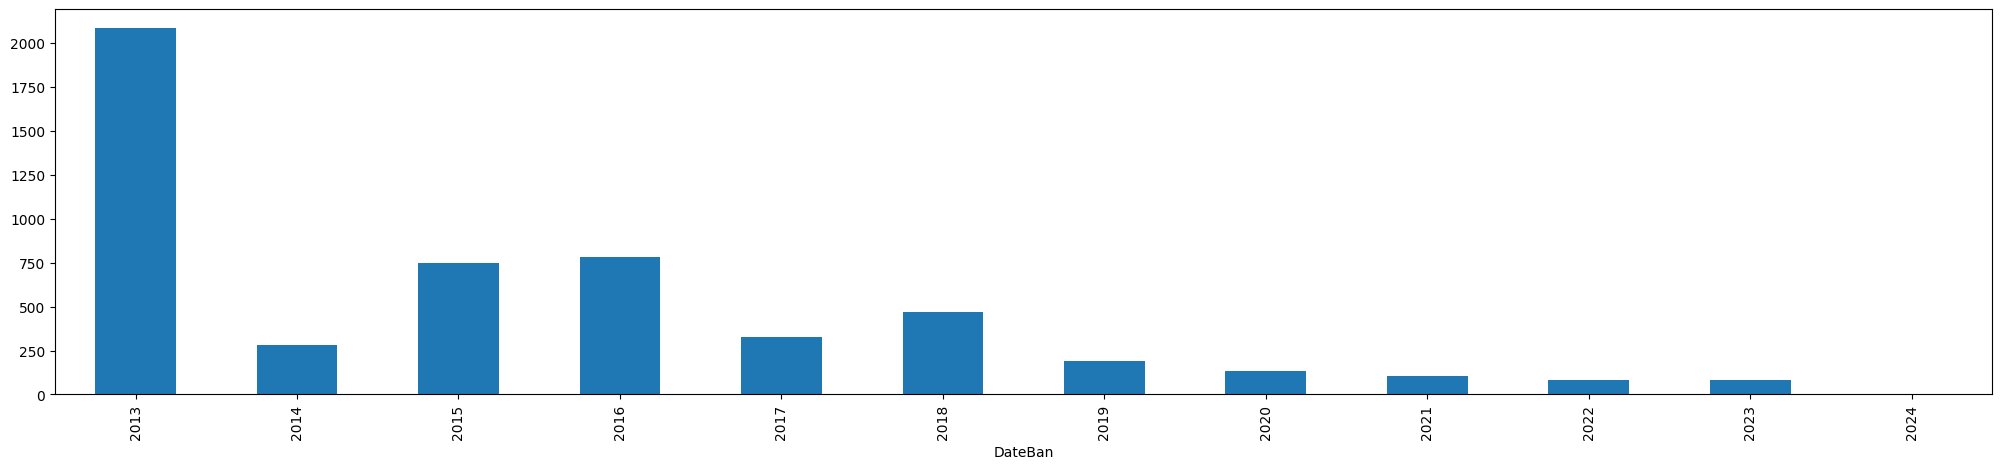

In [5]:
lidrekon_df.groupby([lidrekon_df['DateBan'].dt.year])\
    .size().plot.bar(figsize=(25,5))

In [6]:
df = pd.concat((pen_df, lidrekon_df), axis=0, ignore_index=True)
print(df.shape)
print(null_pct(df))
print(df.dtypes)

(11179, 10)
{'Author': 47.29, 'Title': 0.04, 'Type of Ban': 77.35, 'State': 47.28, 'District': 47.28, 'DateBan': 0.0, 'Origin of Challenge': 47.28, 'Ban Status': 69.93, 'Country': 0.0, 'Description': 52.72}
Author                         object
Title                          object
Type of Ban                    object
State                          object
District                       object
DateBan                datetime64[ns]
Origin of Challenge            object
Ban Status                     object
Country                        object
Description                    object
dtype: object


In [7]:
kasseler_df = pd.read_csv('kasseler/kasseler.csv')
kasseler_df = kasseler_df.drop(kasseler_df.columns[0], axis=1)
kasseler_df = kasseler_df.rename(columns={
    'author': 'Author', 'title':'Title', 'place':'District', 'date':'Date',
    'location':'Country', 'year': 'Year', 'lifed':'DateLifted', 'source':'Description'})
print(null_pct(kasseler_df))
print(kasseler_df.shape)

{'Author': 15.2, 'Title': 0.01, 'District': 71.93, 'Date': 69.23, 'Country': 0.02, 'Year': 53.69, 'lifted': 90.03, 'Description': 0.02}
(121573, 8)


In [8]:
print(kasseler_df.groupby('Date').size().sort_values(ascending=False).to_string())

Date
1934                                2749
1938                                2412
1937                                2335
1940                                2326
1935                                2289
1936                                2285
1939                                2249
1933                                2109
1941                                2076
1942                                1686
1943                                1491
1932                                 950
1944                                 809
1931                                 680
1930                                 579
1928                                 466
1929                                 451
1925                                 396
1919                                 386
1926                                 382
1927                                 364
1920                                 364
1924                                 319
1922                                 290
1921       

In [9]:
print(kasseler_df.groupby('Year').size().sort_values(ascending=False).to_string())

Year
1933.0    4800
1776.0    2885
2007.0    1203
2008.0    1202
2009.0    1172
1940.0    1142
2006.0     975
2005.0     895
1834.0     848
1845.0     821
1838.0     811
1846.0     791
2021.0     788
1967.0     779
1822.0     775
1847.0     771
1833.0     771
1839.0     743
1836.0     726
1835.0     698
1843.0     659
1821.0     652
1840.0     651
1837.0     645
1829.0     638
1842.0     626
1831.0     621
1798.0     599
1799.0     581
1844.0     578
1801.0     570
1802.0     563
1832.0     559
1830.0     553
1841.0     544
2002.0     538
1796.0     536
2001.0     533
1804.0     520
1800.0     519
1823.0     507
2010.0     498
1999.0     496
1826.0     493
1795.0     489
1803.0     488
2004.0     479
1983.0     473
1998.0     453
2000.0     449
2003.0     431
1828.0     429
1825.0     413
1997.0     397
1996.0     395
1827.0     394
1976.0     387
1820.0     370
1824.0     359
1797.0     356
1987.0     305
1991.0     290
1794.0     280
1805.0     278
1994.0     267
1988.0     266
1819.

In [10]:
kasseler_df['Year'] = kasseler_df['Year'].apply(lambda x: None if x<1500 else x)

In [11]:
kasseler_df['DateBan'] = kasseler_df['Year'].where(~kasseler_df['Year'].isnull(),
                                                   other=kasseler_df['Date'])
kasseler_df = kasseler_df.drop(['Date', 'Year'], axis=1)

In [12]:
print(kasseler_df.groupby('DateBan').size().sort_values(ascending=False).to_string())

DateBan
1933.0                             4800
1776.0                             2885
1934                               2420
1940                               2320
1938                               2277
1939                               2247
1937                               2117
1941                               2072
1936                               1995
1935                               1963
1933                               1807
1942                               1682
1943                               1490
2007.0                             1203
2008.0                             1202
2009.0                             1172
1940.0                             1142
2006.0                              975
2005.0                              895
1834.0                              848
1845.0                              821
1838.0                              811
1944                                806
1846.0                              791
2021.0                          

In [13]:
import re
def clean_year(x):
    try:
        if type(x)!=str:
            x = str(int(x))
        match = re.match(r'.*([1-2][0-9]{3})', x)
        if match:
            return match.group(1)
        else:
            print("NO MATCH", x)
            return None
    except:
        return None
    
print(null_pct(kasseler_df))
kasseler_df['DateBan'] = kasseler_df['DateBan'].apply(clean_year)
#kasseler_df['DateBan'] = pd.to_datetime(kasseler_df['DateBan'], format='%Y')
print(null_pct(kasseler_df))
print(kasseler_df.head())

{'Author': 15.2, 'Title': 0.01, 'District': 71.93, 'Country': 0.02, 'lifted': 90.03, 'Description': 0.02, 'DateBan': 29.35}
NO MATCH nchen
NO MATCH 8-39,
NO MATCH A33 [?]
NO MATCH 4-28,
NO MATCH iss.)
NO MATCH Wien
NO MATCH Wien
NO MATCH note.
NO MATCH 11)30 [?]
NO MATCH 937
NO MATCH note.
NO MATCH o J
NO MATCH 193b.
NO MATCH ichel
NO MATCH Wien
NO MATCH 191?
NO MATCH pert.
NO MATCH ßfeld
NO MATCH Otto
NO MATCH Geschichten
NO MATCH reuth
NO MATCH Wien
NO MATCH unde.
NO MATCH 938, -
NO MATCH Anst.
NO MATCH erlin
NO MATCH note.
NO MATCH idel.
NO MATCH o J
NO MATCH Erich
NO MATCH oten.
NO MATCH 943
NO MATCH Verl
NO MATCH Wien
NO MATCH 940..
NO MATCH ten.
NO MATCH oten.
NO MATCH Jun-40
NO MATCH ten.
NO MATCH 938..
NO MATCH l935
NO MATCH 19S0
NO MATCH ürich
NO MATCH nchen
NO MATCH 19?2.
NO MATCH 19j9.
NO MATCH 43, 5
NO MATCH 0-35,
NO MATCH 939-
NO MATCH 7-40,
NO MATCH 0-37,
NO MATCH ller.
NO MATCH Gc.ilyovs)
NO MATCH nchen
NO MATCH 193e.
NO MATCH Adolf
NO MATCH 8-41,
NO MATCH s 39.
NO MATCH

In [14]:
kasseler_df['Year'] = kasseler_df['DateBan'].fillna(-1).astype(int).replace(-1, np.nan)

In [15]:
df['Year'] = df['DateBan'].dt.year
df_final = pd.concat((df, kasseler_df), axis=0, ignore_index=True)

<Axes: xlabel='Author'>

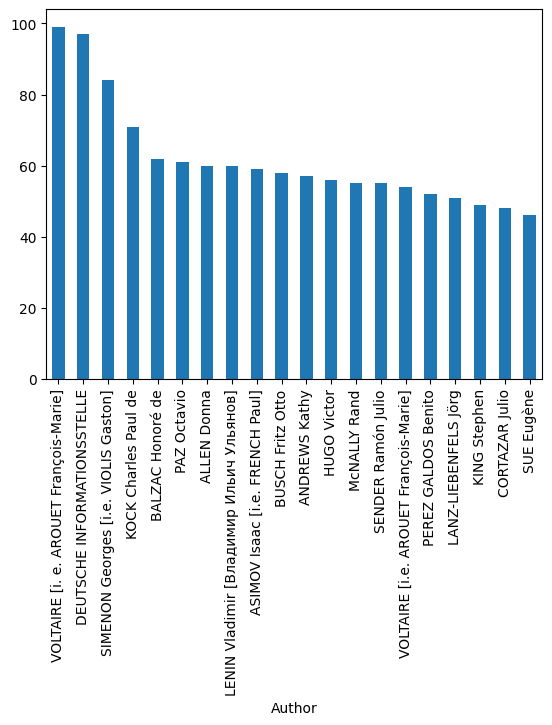

In [16]:
kasseler_df.groupby('Author').size().sort_values(ascending=False)[:20].plot.bar()

<Axes: xlabel='Year'>

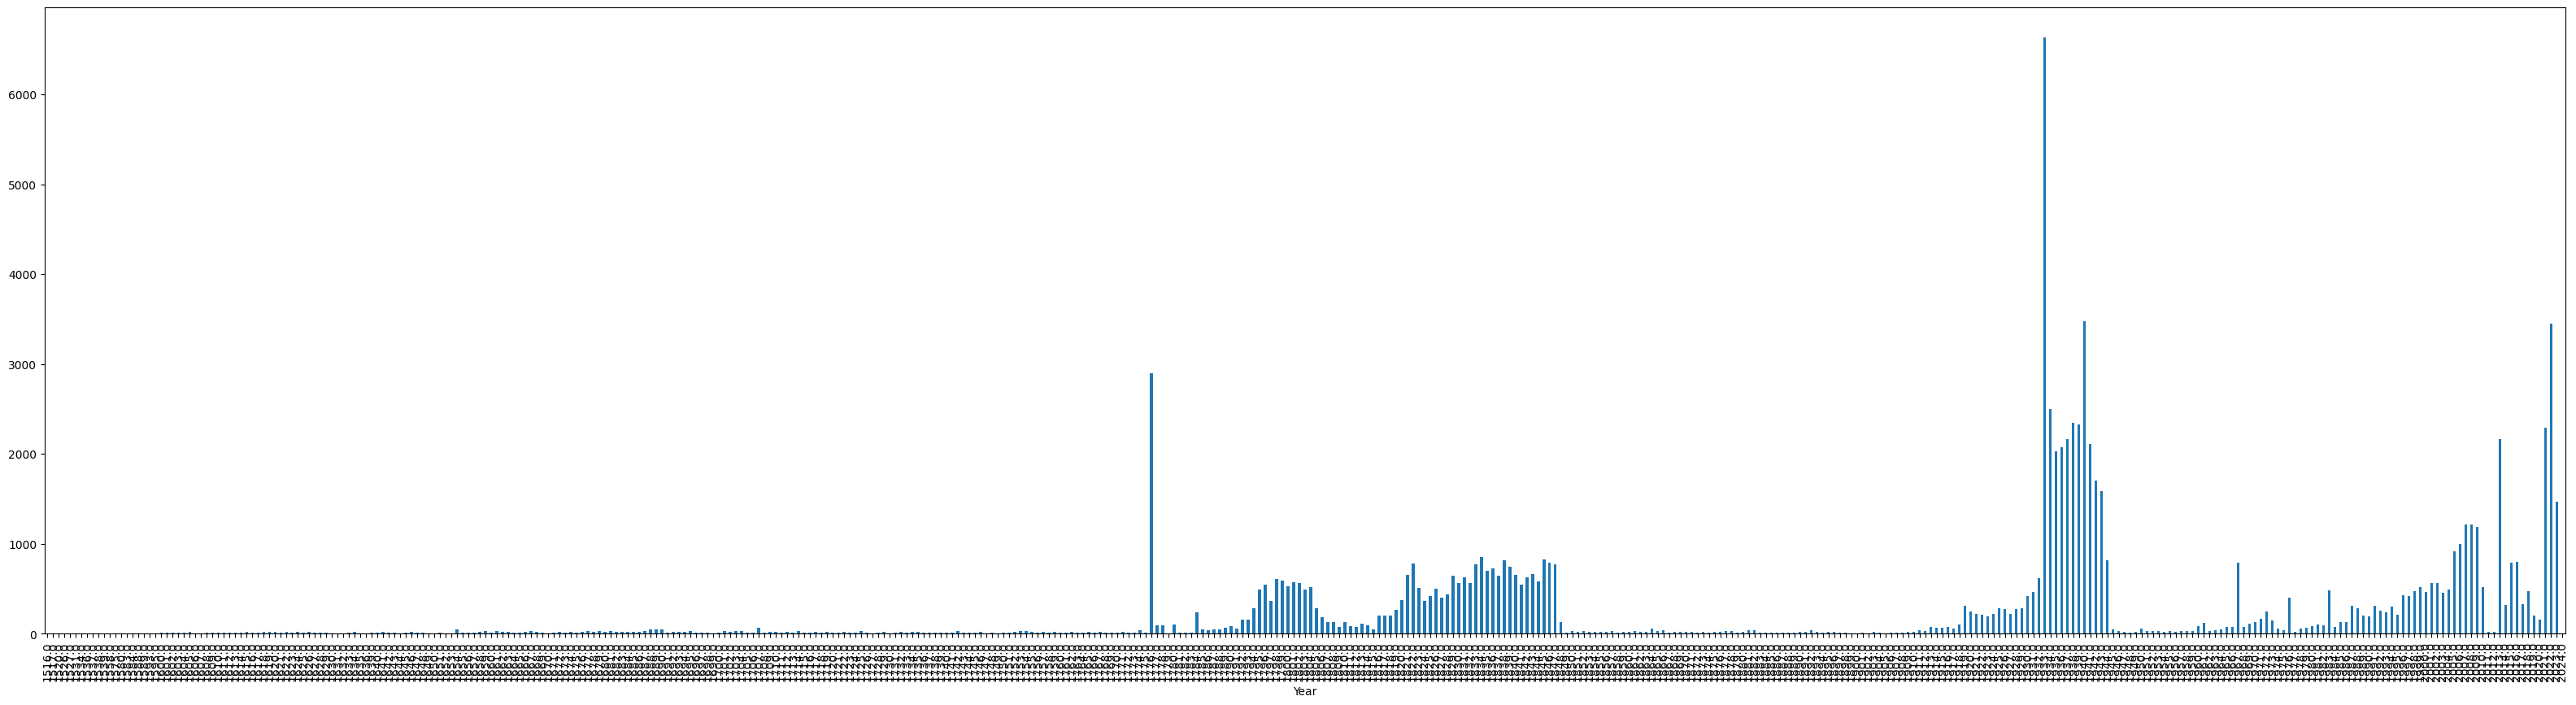

In [17]:
df_final.groupby('Year')\
    .size().plot.bar(figsize=(40,10))

In [18]:
print(df_final.groupby('Country').size().sort_values(ascending=False))
df_final['Country'] = df_final['Country'].apply(lambda x: 'USA' if x=='USA/Texas' else x)

Country
ITA                        31865
AUT                        30249
GC                         29642
USA/Texas                  11791
USA                         6961
                           ...  
GBR/ USA / AUS                 1
GBR, USA, AUS                  1
GBR, AUS                       1
GBR, ARG, NZL, ZAF, CAN        1
various                        1
Length: 119, dtype: int64


In [19]:
import pycountry as pc
def get_country_name(x):
    if type(x)==str and len(x)==3:
        country = pc.countries.get(alpha_3=x)
        if country is not None:
            return country.name
        else:
            return None
    else:
        return None
df_final['CountryName'] = df_final['Country'].apply(get_country_name)

In [20]:
print(df_final.groupby('CountryName').size().sort_values(ascending=False))
print(df_final['CountryName'].isna().sum())

CountryName
Italy                             31865
Austria                           30249
United States                     18752
Russian Federation                 5376
Germany                            4761
Holy See (Vatican City State)      4331
New Zealand                        1306
Norway                             1118
Türkiye                             977
Portugal                            892
Greece                              724
Australia                           517
China                               398
Argentina                           331
Iran, Islamic Republic of           130
South Africa                         98
Netherlands                          80
Bangladesh                           37
Spain                                36
Cameroon                             32
Algeria                              21
Chile                                19
Qatar                                15
Poland                               14
Czechia                     

In [25]:
df_country_ct = df_final.groupby(['Year', 'CountryName']).size().to_frame('size').reset_index()
#df_country_ct = df_country_ct.pivot(index='Year', columns='CountryName', values='size')
print(df_country_ct.to_string())


       Year                     CountryName  size
0    1517.0   Holy See (Vatican City State)     1
1    1520.0   Holy See (Vatican City State)     1
2    1575.0   Holy See (Vatican City State)     1
3    1580.0   Holy See (Vatican City State)     1
4    1584.0   Holy See (Vatican City State)     1
5    1600.0   Holy See (Vatican City State)     8
6    1601.0   Holy See (Vatican City State)    11
7    1602.0   Holy See (Vatican City State)     7
8    1603.0   Holy See (Vatican City State)    10
9    1604.0   Holy See (Vatican City State)     7
10   1605.0   Holy See (Vatican City State)    16
11   1606.0   Holy See (Vatican City State)     3
12   1607.0   Holy See (Vatican City State)     4
13   1608.0   Holy See (Vatican City State)    10
14   1609.0   Holy See (Vatican City State)     7
15   1610.0   Holy See (Vatican City State)     9
16   1611.0   Holy See (Vatican City State)     7
17   1612.0   Holy See (Vatican City State)     6
18   1613.0   Holy See (Vatican City State)    14


In [28]:
fig = px.bar(df_country_ct.sort_values('Year'), x="CountryName", y="size",
  animation_frame="Year")
fig.show()

In [45]:
df_gapminder = px.data.gapminder()
fig = px.scatter_geo(df_gapminder, locations="iso_alpha", color="continent",
                     hover_name="country", size="pop",
                     animation_frame="year",
                     projection="natural earth")
fig.show()

In [46]:
df_gapminder

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [52]:
df_iso_ct = df_final.groupby(['Year', 'Country']).size().to_frame('size').reset_index()\
            .loc[df_final['Country'].str.len() ==3, :]
fig = px.scatter_geo(df_iso_ct, locations="Country", size="size",
                     animation_frame="Year",
                     projection="natural earth")
fig.show()

In [40]:
import requests
import urllib.parse

def get_coord(address):
    headers = headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    url = 'https://nominatim.openstreetmap.org/search?q=United%20States&format=json'
    response = requests.get(url, headers=headers)
    print(response)
    #json_content = response.json()
    #print(json_content)
    #print(json_content[0]["lat"])
    #print(json_content[0]["lon"])

get_coord('United States')

<Response [403]>
